In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.data_loading import load_historical_datasets, load_raw_analyst_ratings
from scripts.data_cleaning import standardize_columns, handle_missing_values, convert_dates
from scripts.data_analysis import analyze_text_lengths, count_articles_by_publisher, extract_top_keywords
from scripts.sentiment_analysis import calculate_sentiment
from scripts.visualization import plot_publication_trends, plot_sentiment_distribution

In [3]:
# File paths
file_paths = [
    '../data/yfinance_data/AAPL_historical_data.csv',
    '../data/yfinance_data/AMZN_historical_data.csv',
    '../data/yfinance_data/GOOG_historical_data.csv',
    '../data/yfinance_data/META_historical_data.csv',
    '../data/yfinance_data/MSFT_historical_data.csv',
    '../data/yfinance_data/NVDA_historical_data.csv',
    '../data/yfinance_data/TSLA_historical_data.csv',
]
raw_ratings_path = '../data/raw_analyst_ratings.csv'

In [4]:
# Load data
datasets = load_historical_datasets(file_paths)
raw_ratings = load_raw_analyst_ratings(raw_ratings_path)

In [5]:
# Data Cleaning
datasets = standardize_columns(datasets)
datasets = handle_missing_values(datasets)
datasets = convert_dates(datasets)

In [6]:
# Combine datasets
historical_data = pd.concat(datasets.values(), ignore_index=True)

In [7]:
# Exploratory Data Analysis
## Headline Length Statistics
headline_stats = analyze_text_lengths(raw_ratings, 'headline')
print("Headline Length Statistics:", headline_stats)

Headline Length Statistics: count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: text_length, dtype: float64


In [8]:
## Publisher Counts
publisher_counts = count_articles_by_publisher(raw_ratings, 'publisher')
print("Top Publishers:\n", publisher_counts)

Top Publishers:
 publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [9]:
# Text Analysis
raw_ratings = calculate_sentiment(raw_ratings, 'headline')
top_keywords = extract_top_keywords(raw_ratings, 'headline', top_n=10)
print("Top Keywords:\n", top_keywords)

Top Keywords:
     keyword          score
7    stocks  149539.632769
3    market   94797.566144
6    shares   93176.130946
0  earnings   78328.184675
8    update   75366.829457
9        vs   65826.306491
4   reports   64795.431428
1       eps   62401.313224
2       est   53859.726234
5     sales   47344.869661


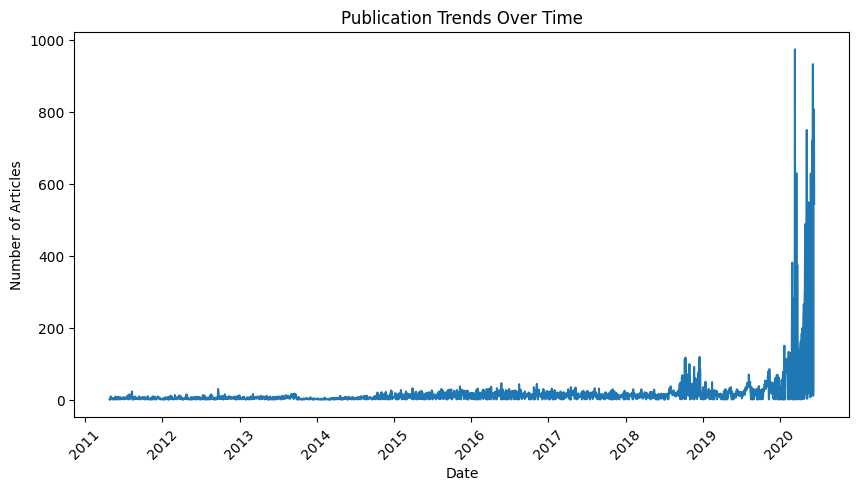

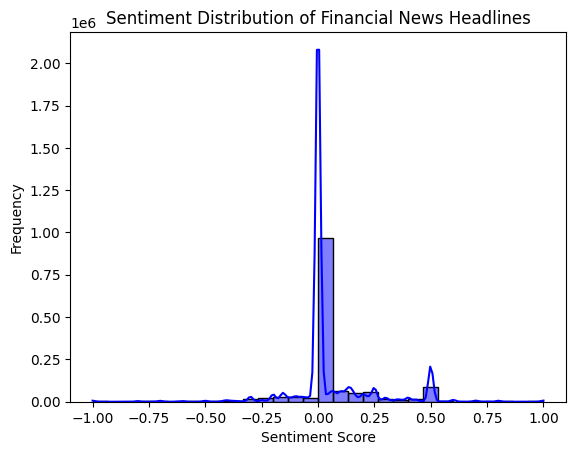

In [10]:
# Visualizations
plot_publication_trends(raw_ratings, 'date')
plot_sentiment_distribution(raw_ratings, 'sentiment')